# La régréssion Logistique
## Introduction
Dans ce chapitre, on s'intéressera à des problèmes de classification binaire. On a m points en  n dimensions, représentés par la matrice  $X\inℝ^{m×n}$, mais leurs étiquettes, représentées par un vecteur $y∈{0,1}^{m}$, représentent l'appartenance (1) ou non (0) à une classe.

Par exemple, les  n variables peuvent représenter le niveau de gris des  n pixels d'une image, et on peut disposer de  m images étiquetées en fonction de si elles représentent ou non un chien. 

Comment créer un modèle linéaire qui prédise si une image représente ou non un chien ?

##### Peut-on utiliser la régression linéaire pour résoudre ce problème ?

Le problème de cette approche est que beaucoup de  points de coordonnées différentes doivent avoir la même étiquette exactement (0 ou 1). Une fonction linéaire n'est pas la bon hypothèse.

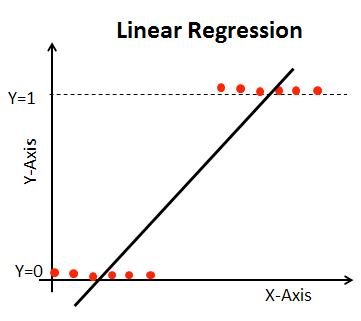

Pour une entrée x, au lieux alors de predire la valeur de y (0,1) pourquoi ne pas prédire la probabilité $P(Y=1|x)$

Nous allons alors utiliser une transformation logistique
$$h_{\theta}(x)=\frac{1}{1+e^{-\theta^{T} x}} $$
- si $h_{\theta}(x)>0.5 $ Alors x est de classe 1
- si $h_{\theta}(x)<0.5 $ Alors x est de classe 0

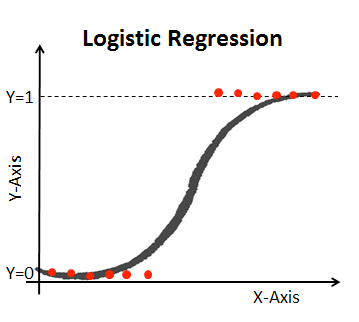

Dans ce cas la fonction objectif (cout) est:

$$J(\theta)=-\frac{1}{m}\sum_{1}^{m}y_{i}log(h_{\theta}(x_{i}))+(1-y_{i})(1-log(h_{\theta}(x_{i}))$$

$$\frac{\delta J(\theta)}{\delta \theta}=\frac{1}{m}\sum_{1}^{m}(h_{\theta}(x_{i})-y_{i})x_{i}$$

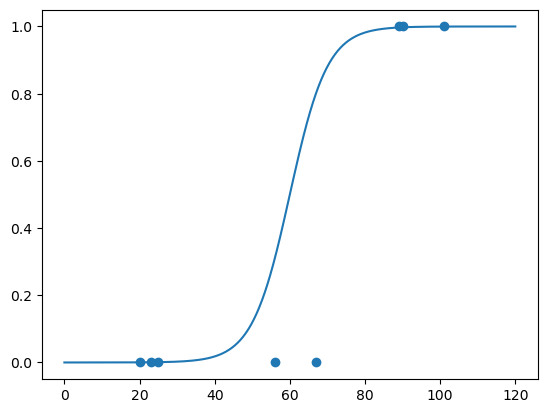

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x=np.array([90,23,67,89,20,25,56,101])
y=np.array([1,0,0,1,0,0,0,1])
plt.scatter(x,y)
xx=np.linspace(0,120,1000)
yy=1/(1+np.exp(-0.2*xx+12))
plt.plot(xx,yy)

### Exercice
Le dataset ci dessous, represente la classification d'un ensemble d'individus en obaise et non obaise selon leur poid, taille et age.
Nom, age, poid, taille, classe

Redouan, 25,79, 165, Obaise    

Mohammed, 48, 81, 176, Non obaise

Aymane, 12, 50, 155, Obaise

Rayane, 18, 60, 176, Non obaise

Ayoube, 8, 30, 140, Non obaise

Mariem, 16, 70, 153, Obaise

Ilyass, 22, 81, 170, Obaise

Hanane, 21, 81, 166, Obaise


1. Créer un DataFrame à partir de ces données
2. Transformer ces données pour les utiliser dans un problème de classification
4. Calculer la matrice de corrélation
4. Entrainer un modèle de régression logistique sur ce dataset
5. Déterminer les classe des individus suivants
Nom, age     poid     taille

Reda       25       76        165

Ahmed      48       84        176

Rachid     36       72        188

In [88]:
nom=np.array(['redouan','mohammed','aymane','rayane','ayoube','mariem','ilyass','hanane'])
age=np.array([25,48,12,18,8,16,22,21],dtype='float32')
poid=np.array([79,81,50,60,30,70,81,81],dtype='float32')
taille=np.array([165,176,155,176,140,153,170,166],dtype='float32')
classe=np.array(['obaise','non obaise','obaise','non obaise','non obaise','obaise','obaise','obaise'])
datas=pd.DataFrame([age,poid,taille,classe],index=['age','poid','taille','classe']).T
#print(datas)
for data in datas.values:
    if data[-1]=='obaise':
        data[-1]=1
    else:
        data[-1]=0
datas.corr()

""


[[  1.  25.  79. 165.]
 [  1.  48.  81. 176.]
 [  1.  12.  50. 155.]
 [  1.  18.  60. 176.]
 [  1.   8.  30. 140.]
 [  1.  16.  70. 153.]
 [  1.  22.  81. 170.]
 [  1.  21.  81. 166.]]


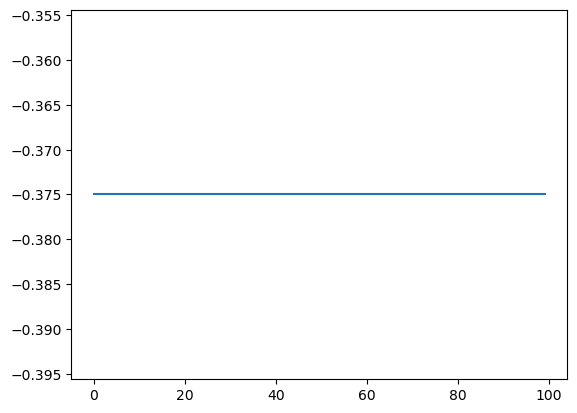

In [87]:
w=np.array([1.,10.,8.,12.])
X=np.stack((np.ones(len(age)),age,poid,taille)).T
Y=np.array(datas.loc[:,'classe'].values,dtype='float32')

alpha=0.001
print(X)
jh=[]
for i in range(100):
    yh=1/(1+np.exp(-X.dot(w)))
    j=-(Y.dot(np.log(yh))+(1-Y).dot(1-np.log(yh)))/X.shape[0]
    jh+=[j]
    
plt.plot(jh)
#    pass